# Análisis y Predicción de Comportamiento de Usuarios en Redes Sociales

Este proyecto se centra en el análisis y la predicción del comportamiento de los usuarios en una red social en particular. El conjunto de datos proporciona información detallada sobre cada usuario, incluyendo género, edad, salario estimado y si compraron o no un producto después de hacer clic en un anuncio en la red social. Utilizando técnicas de análisis de datos y machine learning, se explorará este conjunto de datos para comprender mejor los patrones de comportamiento de los usuarios y desarrollar modelos predictivos que puedan predecir la probabilidad de compra de un producto por parte de un usuario en función de sus características.

1. User ID: Identificador único de cada usuario en la red social.
2. Gender: Género del usuario (Male/Female).
3. Age: Edad del usuario.
4. EstimatedSalary: Salario estimado del usuario.
5. Purchased: Variable objetivo que indica si el usuario compró (1) o no (0) el producto después de hacer clic en un anuncio en la red social.

## Carga del dataset

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [114]:
data = pd.read_csv('../Datasets/Social_Network_Ads.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


## Análisis de datos

In [4]:
data['Purchased'].describe()

count    400.000000
mean       0.357500
std        0.479864
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Purchased, dtype: float64

Verificamos si existe un desbalance en el target de compra.

<Axes: xlabel='Purchased'>

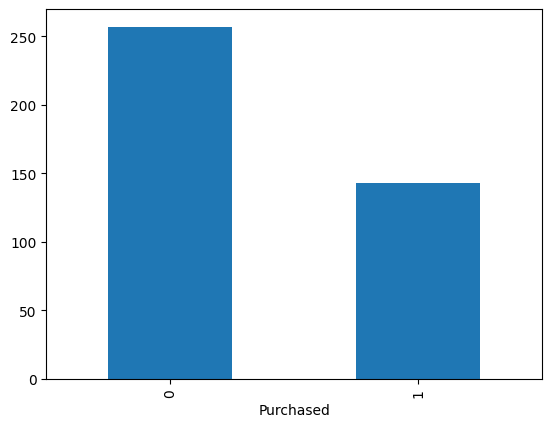

In [5]:
data['Purchased'].value_counts().plot.bar()

Visualizamos si existe alguna diferencia significativa en las tasas de compra entre los géneros.

Gender     Female  Male
Purchased              
0             127   130
1              77    66


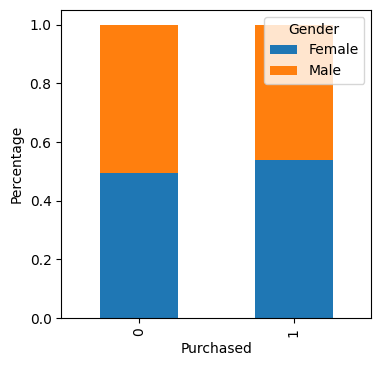

In [6]:
print(pd.crosstab(data["Purchased"], data["Gender"]))
Gender = pd.crosstab(data["Purchased"], data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

Con un histograma podemos ver los picos donde se concentran la mayor cantidad de edades de los compradores

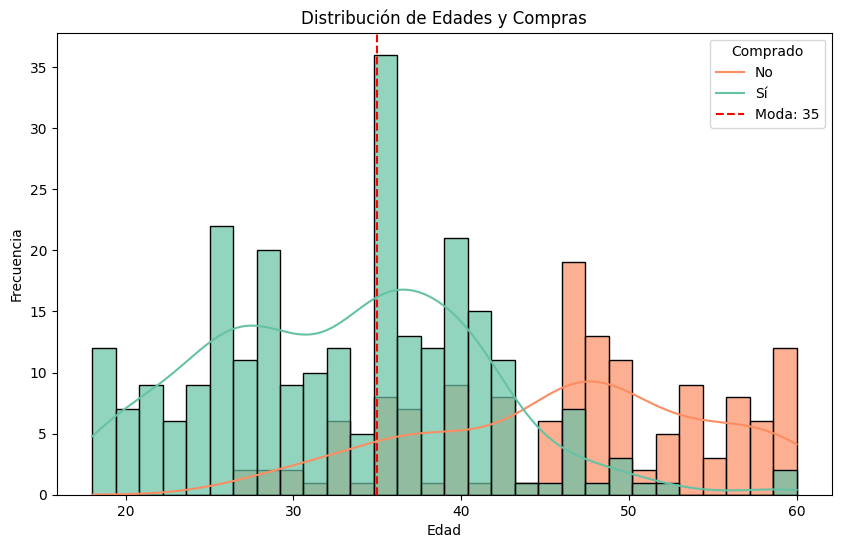

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True, hue='Purchased', palette='Set2', alpha=0.7)
max_age = data['Age'].mode().values[0] 
plt.axvline(x=max_age, color='red', linestyle='--', label=f'Moda: {max_age}')
plt.title('Distribución de Edades y Compras')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Comprado', labels=['No', 'Sí', f'Moda: {max_age}'])
plt.show()

Lo dividimos por genero, aunque como esperabamos no se ve una diferencia significativa

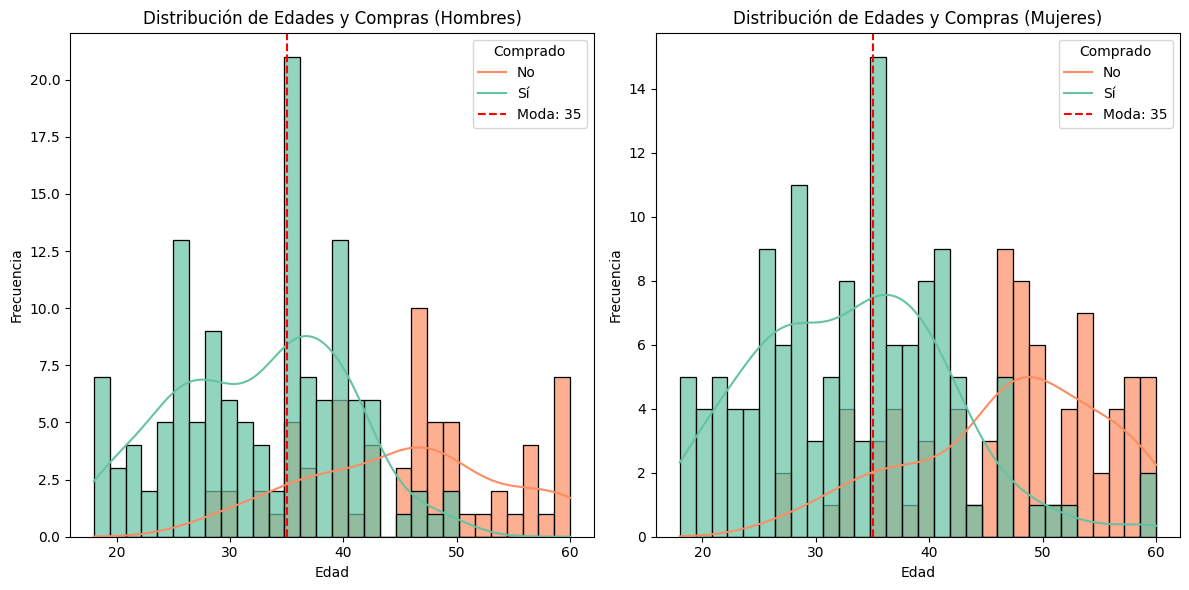

In [8]:
plt.figure(figsize=(12, 6))

# Histograma para hombres
plt.subplot(1, 2, 1)
sns.histplot(data=data[data['Gender'] == 'Male'], x='Age', bins=30, kde=True, hue='Purchased', palette='Set2', alpha=0.7)
max_age_male = data[data['Gender'] == 'Male']['Age'].mode().values[0]  # Moda de edad para hombres
plt.axvline(x=max_age_male, color='red', linestyle='--', label=f'Moda: {max_age_male}')
plt.title('Distribución de Edades y Compras (Hombres)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Comprado', labels=['No', 'Sí', f'Moda: {max_age_male}'])

# Histograma para mujeres
plt.subplot(1, 2, 2)
sns.histplot(data=data[data['Gender'] == 'Female'], x='Age', bins=30, kde=True, hue='Purchased', palette='Set2', alpha=0.7)
max_age_female = data[data['Gender'] == 'Female']['Age'].mode().values[0]  # Moda de edad para mujeres
plt.axvline(x=max_age_female, color='red', linestyle='--', label=f'Moda: {max_age_female}')
plt.title('Distribución de Edades y Compras (Mujeres)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Comprado', labels=['No', 'Sí', f'Moda: {max_age_female}'])

plt.tight_layout()
plt.show()

<Axes: xlabel='Purchased', ylabel='Age'>

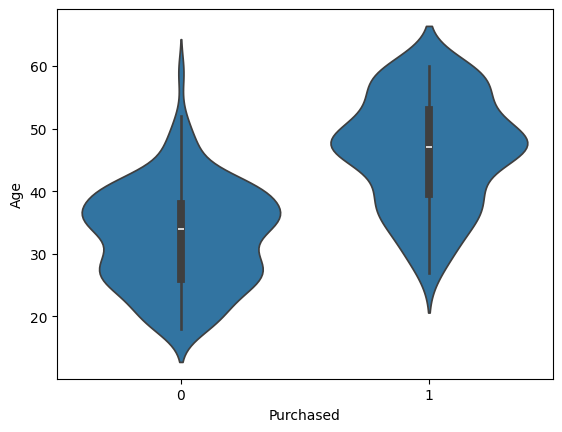

In [9]:
sns.violinplot(x='Purchased',y='Age',data=data)

El salario de quienes compraron ronda en un rango aproximado de 50.000 y 90.000

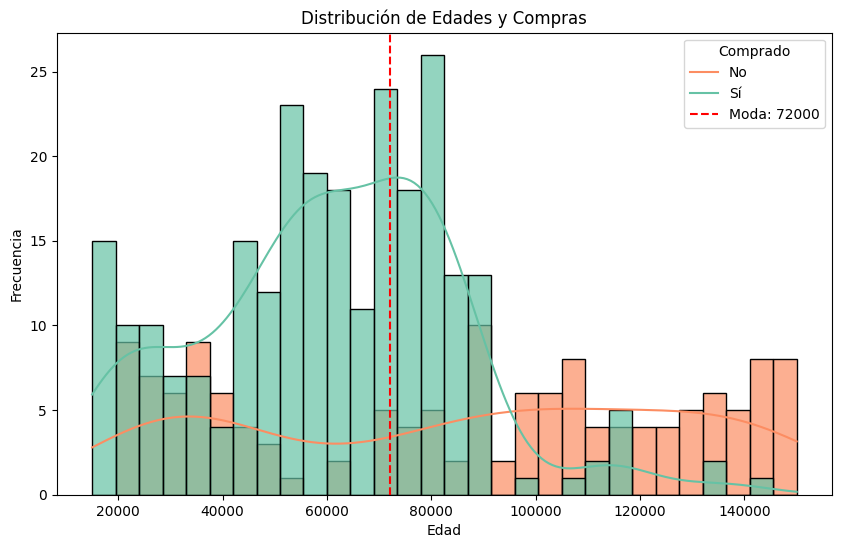

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='EstimatedSalary', bins=30, kde=True, hue='Purchased', palette='Set2', alpha=0.7)
max_salary = data['EstimatedSalary'].mode().values[0] 
plt.axvline(x=max_salary, color='red', linestyle='--', label=f'Moda: {max_salary}')
plt.title('Distribución de Edades y Compras')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Comprado', labels=['No', 'Sí', f'Moda: {max_salary}'])
plt.show()

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

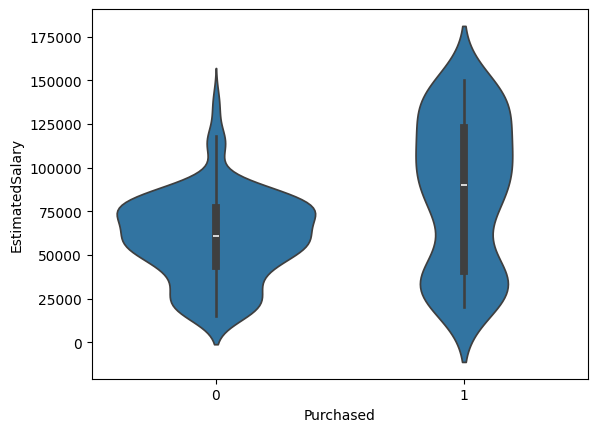

In [11]:
sns.violinplot(x='Purchased',y='EstimatedSalary',data=data)

En base a los graficos podemos concluir que:
- Ambas variables son utiles para el analisis debido a que su mediana no es la misma. 
- Adicionalmente respecto a la grafica analizando la edad podemos observar que solo presenta una moda mientras que en la 
grafica del salario estimado se puede apreciar una distribucion mas bimodal

## Test estadísticos

### Prueba de Correlación
* Ho: No hay correlación entre las variables
* Ha: Existe correlación entre las variables

<Axes: >

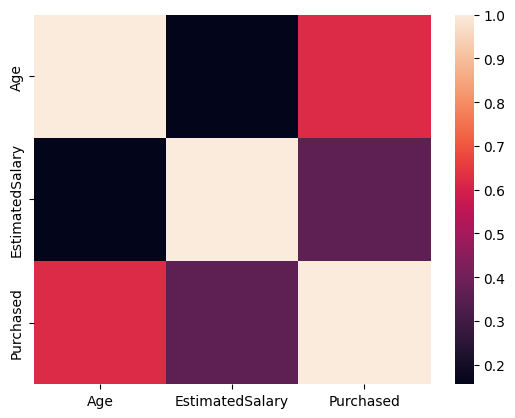

In [12]:
sns.heatmap(data.iloc[:,2:].corr())

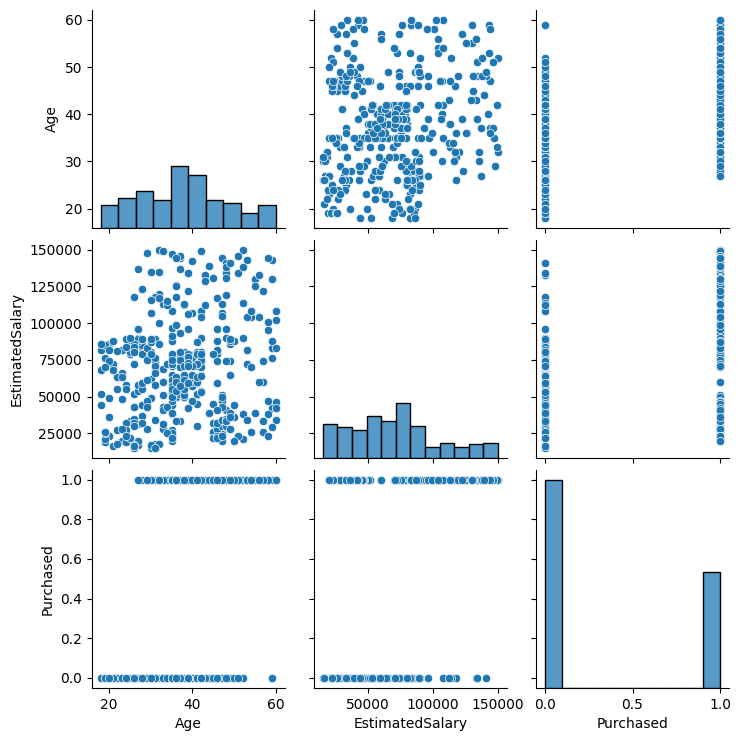

In [13]:
sns.pairplot(data.iloc[:,2:])

In [14]:
variables = ['Age', 'EstimatedSalary', 'Purchased']
alpha = 0.05
method = "spearmanr"
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        # para data no distribuida normalmente
        if method == "spearmanr": 
            correlation, p_value = ss.spearmanr(data[var1], data[var2])
            
        # para data no distribuida normalmente - preferido sobre spearman
        elif method == "kendall":
            correlation, p_value = ss.kendalltau(data[var1], data[var2])
            
        # para data distribuida normalmente
        elif method == "pearsonr":
            correlation, p_value = ss.pearsonr(data[var1], data[var2])

        
        print(f'Correlación entre {var1} y {var2}:')
        print(f'Coeficiente de correlación de {method}: {correlation:.2f}')
        print(f'P-valor: {p_value:.2f}')
        
        if p_value < alpha:
            print('La hipótesis nula (Ho) se rechaza.')
            print('Existe correlación entre las variables.')
        else:
            print('La hipótesis nula (Ho) no se rechaza.')
            print('No existe correlación entre las variables.')
        print()

Correlación entre Age y EstimatedSalary:
Coeficiente de correlación de spearmanr: 0.12
P-valor: 0.01
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre Age y Purchased:
Coeficiente de correlación de spearmanr: 0.61
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre EstimatedSalary y Purchased:
Coeficiente de correlación de spearmanr: 0.31
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.



### Prueba de normalidad
* Ho: la variable se aproxima a una distribución normal
* Ha: la variable no se aproxima a una distribución normal

In [15]:
variables = ['Age', 'EstimatedSalary']
alpha = 0.05
for var in variables:
    stat, p_value = ss.shapiro(data[var])
    
    print(f'Prueba de normalidad para la variable {var}:')
    print(f'Estadístico de prueba: {stat:.2f}')
    print(f'P-valor: {p_value:.2f}')
    
    if p_value < alpha:
        print('La hipótesis nula (Ho) se rechaza.')
        print('La variable no se aproxima a una distribución normal.')
    else:
        print('La hipótesis nula (Ho) no se rechaza.')
        print('La variable se aproxima a una distribución normal.')
    print()

Prueba de normalidad para la variable Age:
Estadístico de prueba: 0.98
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.

Prueba de normalidad para la variable EstimatedSalary:
Estadístico de prueba: 0.96
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.



- Aunque el puntaje estadistico indica que las variables siguen una distribución normal, el p-value nos indica que estos resultados puedan ser debidos al azar
- Podriamos considerar investigar otras variables de los usuarios 
- Investigar que segmentos existen dentro de la edad del usuario y el salario estimado

### Prueba Chi-Cuadrado
* Ho: no existe dependencia entre las variables
* Ha: existe dependencia entre las variables

In [16]:
variables = ['Gender', 'Purchased']
alpha = 0.05
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        
        contingency_table = pd.crosstab(data[var1], data[var2])
        chi2, p_value, dof, expected = ss.chi2_contingency(contingency_table)
        
        print(f'Prueba Chi-Cuadrado entre {var1} y {var2}:')
        print(f'Estadístico Chi-Cuadrado: {chi2:.2f}')
        print(f'P-valor: {p_value:.2f}')
        
        if p_value < alpha:
            print('La hipótesis nula (Ho) se rechaza.')
            print('Existe dependencia entre las variables.')
        else:
            print('La hipótesis nula (Ho) no se rechaza.')
            print('No existe dependencia entre las variables.')
        print()

Prueba Chi-Cuadrado entre Gender y Purchased:
Estadístico Chi-Cuadrado: 0.56
P-valor: 0.46
La hipótesis nula (Ho) no se rechaza.
No existe dependencia entre las variables.



## Modelos predictivos

In [17]:
x = data.iloc[:,[2, 3]].values
y = data.iloc[:,-1].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [19]:
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

### 1. KNN

In [20]:
cv_scores_KNN = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=5)
cv_scores_KNN

array([0.84375 , 0.859375, 0.90625 , 0.90625 , 0.984375])

In [21]:
print("cv_scores mean: {}".format(np.mean(cv_scores_KNN)))
print("cv_scores std: {}".format(np.std(cv_scores_KNN)))

cv_scores mean: 0.9
cv_scores std: 0.04901370981674413


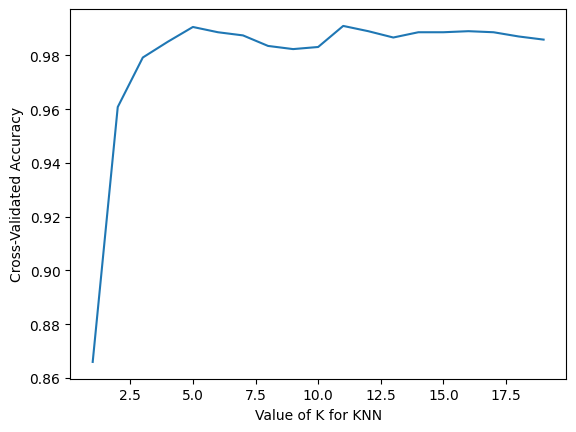

Best K = 11


In [22]:
k_range = range(1, 20)
k_scores = []
best_K = 0
current_auc = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    y_pred_prob_KNN = knn.predict_proba(X_test)
    false_positive_rate_KNN, true_positive_rate_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN[:,1])
    roc_auc_KNN = auc(false_positive_rate_KNN, true_positive_rate_KNN)
    k_scores.append(roc_auc_KNN)

    if roc_auc_KNN > current_auc:
        current_auc = roc_auc_KNN
        best_K = k
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print("Best K = " + str(best_K))

In [23]:
classifier_KNN = KNeighborsClassifier(n_neighbors=best_K).fit(X_train, y_train)
y_pred_KNN = classifier_KNN.predict(X_test)

Confusion matrix, without normalization
[[55  3]
 [ 1 21]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.04545455 0.95454545]]


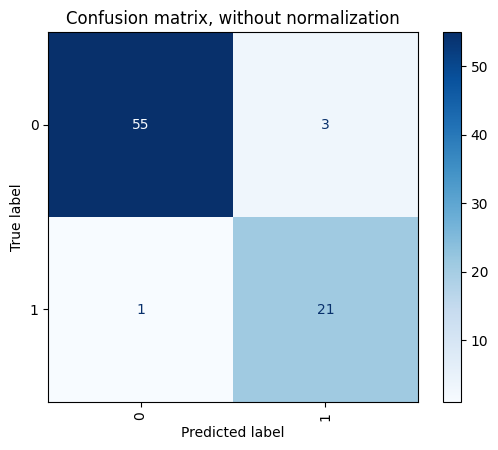

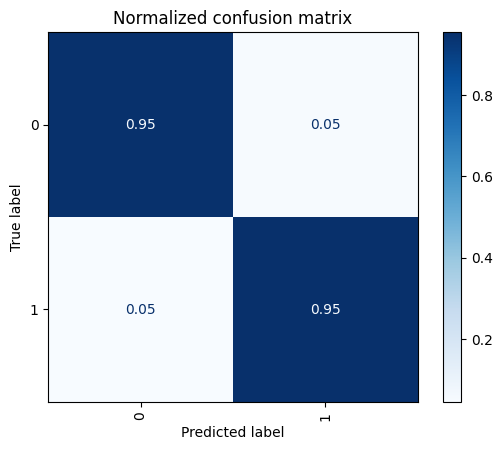

In [24]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_KNN = confusion_matrix(y_test, classifier_KNN.predict(X_test))
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN, display_labels=classifier_KNN.classes_)
    if normalize:
        cm_normalized = cm_KNN.astype('float') / cm_KNN.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_KNN.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_KNN if not normalize else cm_normalized)

plt.show()

In [25]:
y_pred_prob_KNN = classifier_KNN.predict_proba(X_test)
y_pred_prob_KNN[:5,:]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.90909091, 0.09090909],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [26]:
false_positive_rate_KNN, true_positive_rate_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN[:,1])
roc_auc_KNN = auc(false_positive_rate_KNN, true_positive_rate_KNN)
roc_auc_KNN

0.9909874608150471

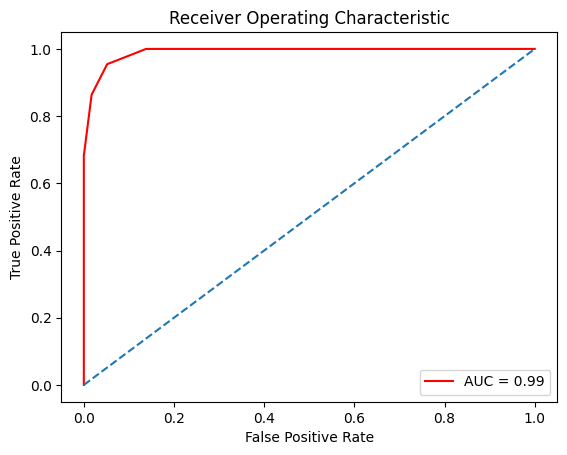

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_KNN, true_positive_rate_KNN, color='red',label = 'AUC = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



### 2. Decision Tree

In [29]:
cv_scores_DT = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
cv_scores_DT

array([0.890625, 0.78125 , 0.828125, 0.84375 , 0.828125])

In [30]:
print("cv_scores mean: {}".format(np.mean(cv_scores_DT)))
print("cv_scores std: {}".format(np.std(cv_scores_DT)))

cv_scores mean: 0.834375
cv_scores std: 0.0350780380010057


In [31]:
param_grid_DT = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_DT = GridSearchCV(DecisionTreeClassifier(), param_grid_DT, refit=True, verbose=2, cv=5)
grid_DT.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=3, min_samples_leaf=100; total time=   0.0s
[CV] END ..criterion=gini, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [32]:
grid_DT.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}

In [33]:
classifier_DT = DecisionTreeClassifier(criterion="gini",max_depth=2, min_samples_leaf=5).fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

Confusion matrix, without normalization
[[55  3]
 [ 1 21]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.04545455 0.95454545]]


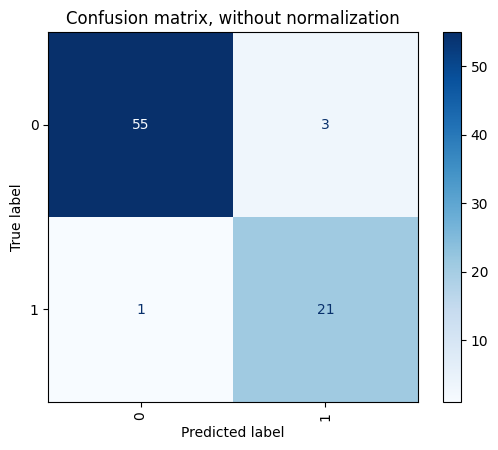

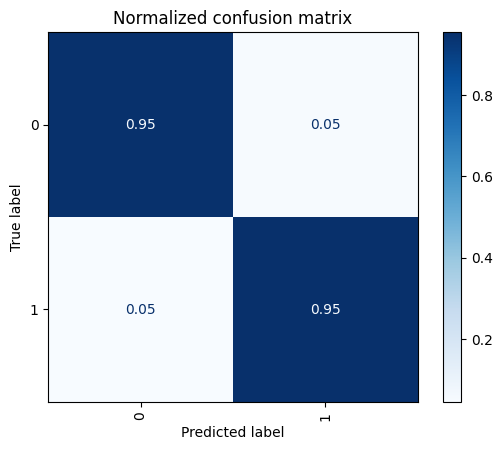

In [34]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_DT = confusion_matrix(y_test, classifier_DT.predict(X_test))
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=classifier_DT.classes_)
    if normalize:
        cm_normalized = cm_DT.astype('float') / cm_DT.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_DT.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_DT if not normalize else cm_normalized)

plt.show()

In [35]:
y_pred_prob_DT = classifier_DT.predict_proba(X_test)
y_pred_prob_DT[:5,:]

array([[0.95698925, 0.04301075],
       [0.95698925, 0.04301075],
       [0.95698925, 0.04301075],
       [0.95698925, 0.04301075],
       [0.95698925, 0.04301075]])

In [36]:
false_positive_rate_DT, true_positive_rate_DT, thresholds_DT = roc_curve(y_test, y_pred_prob_DT[:,1])
roc_auc_DT = auc(false_positive_rate_DT, true_positive_rate_DT)
roc_auc_DT

0.9494514106583072

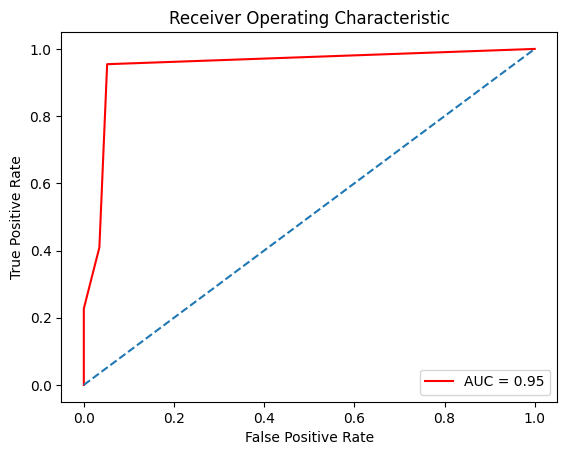

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_DT, true_positive_rate_DT, color='red',label = 'AUC = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



### 3. Naive Bayes

In [39]:
cv_scores_NB = cross_val_score(GaussianNB(), X_train, y_train, cv=5)
cv_scores_NB

array([0.859375, 0.8125  , 0.859375, 0.90625 , 0.96875 ])

In [40]:
print("cv_scores mean: {}".format(np.mean(cv_scores_NB)))
print("cv_scores std: {}".format(np.std(cv_scores_NB)))

cv_scores mean: 0.88125
cv_scores std: 0.05284854539152426


In [41]:
classifier_NB = GaussianNB().fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

Confusion matrix, without normalization
[[55  3]
 [ 4 18]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.18181818 0.81818182]]


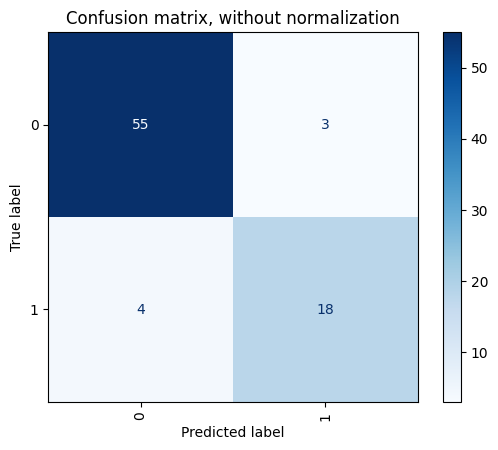

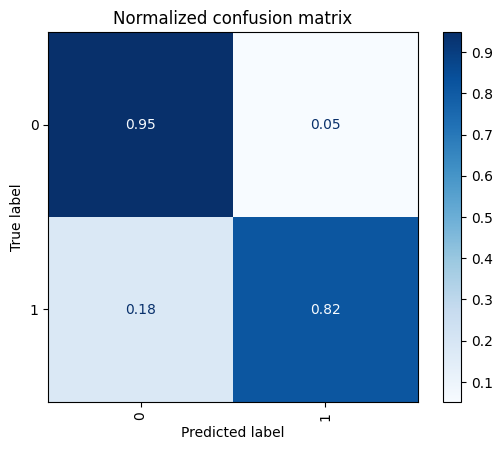

In [42]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_NB = confusion_matrix(y_test, classifier_NB.predict(X_test))
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=classifier_NB.classes_)
    if normalize:
        cm_normalized = cm_NB.astype('float') / cm_NB.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_NB.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_NB if not normalize else cm_normalized)

plt.show()

In [43]:
y_pred_prob_NB = classifier_NB.predict_proba(X_test)
y_pred_prob_NB[:5,:]

array([[0.89400067, 0.10599933],
       [0.84165896, 0.15834104],
       [0.85348304, 0.14651696],
       [0.92105103, 0.07894897],
       [0.89959751, 0.10040249]])

In [44]:
false_positive_rate_NB, true_positive_rate_NB, thresholds_NB = roc_curve(y_test, y_pred_prob_NB[:,1])
roc_auc_NB = auc(false_positive_rate_NB, true_positive_rate_NB)
roc_auc_NB

0.9843260188087775

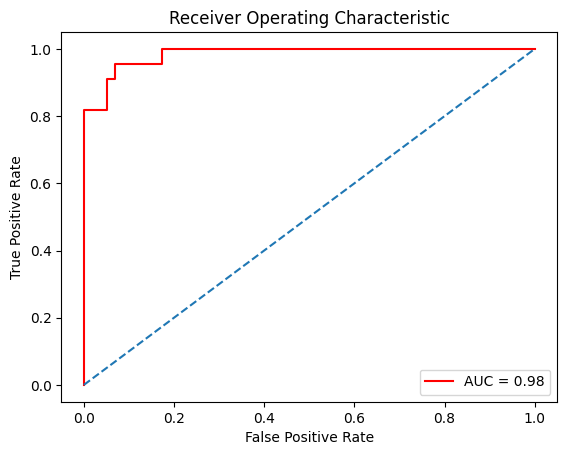

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_NB, true_positive_rate_NB, color='red',label = 'AUC = %0.2f' % roc_auc_NB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



### 4. ANN

In [47]:
cv_scores_ANN = cross_val_score(MLPClassifier(max_iter=1500), X_train, y_train, cv=5)
cv_scores_ANN

array([0.875   , 0.84375 , 0.875   , 0.890625, 0.96875 ])

In [48]:
print("cv_scores mean: {}".format(np.mean(cv_scores_ANN)))
print("cv_scores std: {}".format(np.std(cv_scores_ANN)))

cv_scores mean: 0.890625
cv_scores std: 0.04192627457812106


In [49]:
param_grid_ANN = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [1500, 2000]
}
grid_ANN = GridSearchCV(MLPClassifier(), param_grid_ANN, refit=True, verbose=2, cv=5, n_jobs=-1)
grid_ANN.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=1500, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=1500, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=1500, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=1500, solver=sgd; total time=   3.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=1500, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=1500, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=1500, solver=adam; total time=   2.

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1500, 2000], 'solver': ['sgd', 'adam']},
             verbose=2)

In [50]:
grid_ANN.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'adaptive',
 'max_iter': 1500,
 'solver': 'adam'}

In [49]:
classifier_ANN = MLPClassifier(activation="tanh", max_iter=1500,hidden_layer_sizes=(10, 30, 10), alpha=0.0001, solver='adam', learning_rate="adaptive").fit(X_train, y_train)
y_pred_ANN = classifier_ANN.predict(X_test)

Confusion matrix, without normalization
[[55  3]
 [ 1 21]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.04545455 0.95454545]]


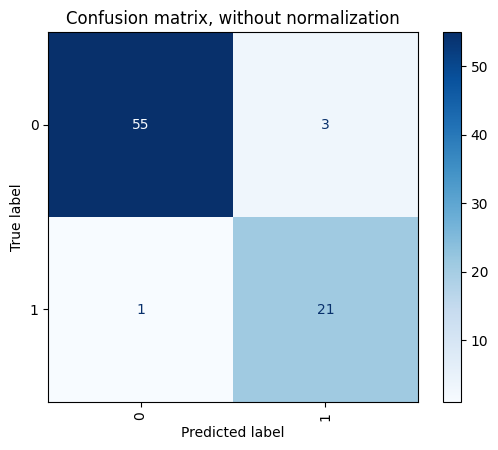

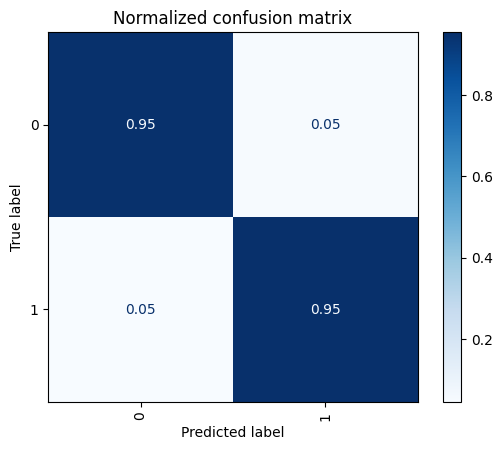

In [118]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm_ANN = confusion_matrix(y_test, classifier_ANN.predict(X_test))
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ANN, display_labels=classifier_ANN.classes_)
    if normalize:
        cm_normalized = cm_ANN.astype('float') / cm_ANN.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier_ANN.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm_ANN if not normalize else cm_normalized)

plt.show()

In [50]:
y_pred_prob_ANN = classifier_ANN.predict_proba(X_test)
y_pred_prob_ANN[:5,:]

array([[0.90238599, 0.09761401],
       [0.98304422, 0.01695578],
       [0.96995139, 0.03004861],
       [0.97796095, 0.02203905],
       [0.98964085, 0.01035915]])

In [51]:
false_positive_rate_ANN, true_positive_rate_ANN, thresholds_ANN = roc_curve(y_test, y_pred_prob_ANN[:,1])
roc_auc_ANN = auc(false_positive_rate_ANN, true_positive_rate_ANN)
roc_auc_ANN

0.9843260188087773

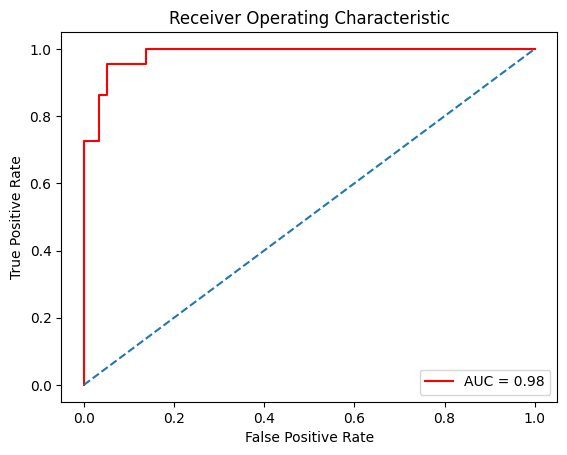

In [52]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_ANN, true_positive_rate_ANN, color='red',label = 'AUC = %0.2f' % roc_auc_ANN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
print(classification_report(y_test, y_pred_ANN))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



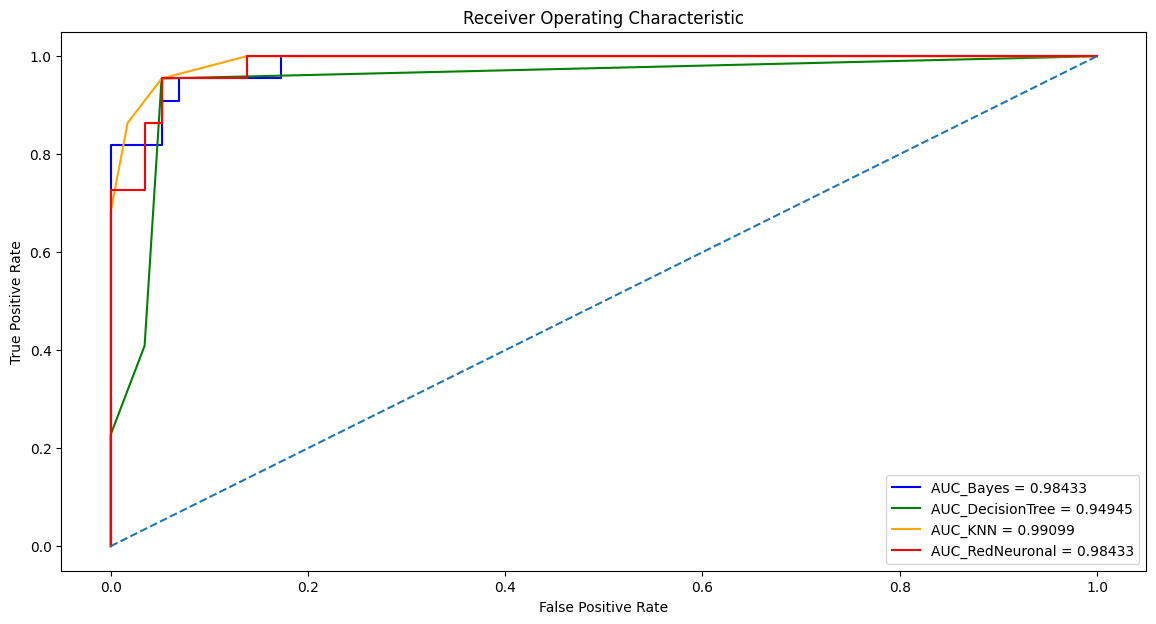

In [54]:
plt.figure(figsize=(14,7), dpi=100)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_NB, true_positive_rate_NB, color='blue',label = 'AUC_Bayes = %0.5f' % roc_auc_NB)
plt.plot(false_positive_rate_DT, true_positive_rate_DT, color='green',label = 'AUC_DecisionTree = %0.5f' % roc_auc_DT)
plt.plot(false_positive_rate_KNN, true_positive_rate_KNN, color='orange',label = 'AUC_KNN = %0.5f' % roc_auc_KNN)
plt.plot(false_positive_rate_ANN, true_positive_rate_ANN, color='red',label = 'AUC_RedNeuronal = %0.5f' % roc_auc_ANN)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Luego de entrenar los modelos de MachineLearning y evaluarlos podemos concluir que el mejor modelo de clasificación es el de KNN un con K de 11 y puntaje AUC de aproximadamente 99%

## Asignación de categorías basadas en probabilidades de predicción

In [109]:
dataf_combined_knn = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred_KNN),pd.DataFrame(y_pred_prob_KNN)],axis=1)
dataf_combined_knn.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']
dataf_combined_knn.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,-0.798951,0.494608,0,0,1.000000,0.000000
1,-0.021265,-0.577359,0,0,1.000000,0.000000
2,-0.312897,0.146943,0,0,0.909091,0.090909
3,-0.798951,0.262831,0,0,1.000000,0.000000
4,-0.312897,-0.577359,0,0,1.000000,0.000000
5,-1.090583,-1.446521,0,0,1.000000,0.000000
6,-0.701740,-1.591382,0,0,1.000000,0.000000
7,-0.215686,2.146016,1,1,0.000000,1.000000
8,-1.965480,-0.055862,0,0,1.000000,0.000000
9,0.853632,-0.780164,0,1,0.181818,0.818182


In [110]:
df_original_features = pd.DataFrame(X_test, columns=['Age', 'EstimatedSalary'])
df_original = pd.DataFrame(transformer.inverse_transform(df_original_features), columns=['Age', 'EstimatedSalary'])

df_original[['Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']] = dataf_combined_knn[['Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']]
df_original.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30.0,87000.0,0,0,1.000000,0.000000
1,38.0,50000.0,0,0,1.000000,0.000000
2,35.0,75000.0,0,0,0.909091,0.090909
3,30.0,79000.0,0,0,1.000000,0.000000
4,35.0,50000.0,0,0,1.000000,0.000000
5,27.0,20000.0,0,0,1.000000,0.000000
6,31.0,15000.0,0,0,1.000000,0.000000
7,36.0,144000.0,1,1,0.000000,1.000000
8,18.0,68000.0,0,0,1.000000,0.000000
9,47.0,43000.0,0,1,0.181818,0.818182


Calculamos los cuantiles de las probabilidades de predicción y se definieron categorías correspondientes a diferentes rangos de probabilidades.

In [111]:
quantiles = df_original['Purchased_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.000000
0.4    0.000000
0.6    0.090909
0.8    0.818182
Name: Purchased_Pred_Prob_1, dtype: float64

In [119]:
def asignar_categoria(valor):
    if valor <= 0.2:
        return 'MB'  # Muy bajo
    elif valor <= 0.4:
        return 'B'   # Bajo
    elif valor <= 0.6:
        return 'M'   # Medio
    elif valor <= 0.8:
        return 'A'   # Alto
    else:
        return 'MA'  # Muy alto

df_original['Score'] = df_original['Purchased_Pred_Prob_1'].apply(asignar_categoria)
df_original

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1,Score
0,30.0,87000.0,0,0,1.000000,0.000000,MB
1,38.0,50000.0,0,0,1.000000,0.000000,MB
2,35.0,75000.0,0,0,0.909091,0.090909,MB
3,30.0,79000.0,0,0,1.000000,0.000000,MB
4,35.0,50000.0,0,0,1.000000,0.000000,MB
...,...,...,...,...,...,...,...
75,18.0,82000.0,0,0,1.000000,0.000000,MB
76,42.0,79000.0,0,0,0.818182,0.181818,MB
77,40.0,60000.0,0,0,1.000000,0.000000,MB
78,53.0,34000.0,1,1,0.090909,0.909091,MA
